<pre style='font-size :25px; text-align: center'><b>ASSIGNMENT 2</b></pre>
<pre style='font-size :20px'><b>INTRODUCTION TO DIMENSIONALITY REDUCTION AND IMAGE COMPRESSION</b></pre>
<pre style='font-size :15px'>In your last assignment you will be taught the core conepts of dimenisonality
reduction with PCA and TSNE. Also, you will discover an interesting 
application of clustering named image compression. Hope, you'll have fun!</pre>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Dimensionality reduction with PCA and TSNE</b></pre>
<pre style='font-size : 15px;'>Firstly let's import necessary packages. </pre>

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<pre style='font-size : 15px;'>Let's load our dataset and cast it to dataframe. </pre>

In [3]:
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])

In [5]:
df['target'] = data['target']

In [6]:
df['target_names'] = df['target'].apply(lambda x: 'malignant' if x==0 else 'benign')

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


<pre style='font-size : 15px;'>In order to use PCA we should have our features on the same scale.
For this purpose we will use <b>StandardScaler</b> that standardizes features 
by removing the mean and scaling to unit variance.</pre>

In [13]:
scaler = StandardScaler()
scaler.fit(df[data['feature_names']])
X = scaler.transform(df[data['feature_names']])

<pre style='font-size : 15px;'>We then use PCA with two components, meaning that we 
transofrm our 30 features just to 2.</pre>

In [14]:
transformed_pca = PCA(n_components=2).fit_transform(X)

<pre style='font-size : 15px;'>We now can use PCA to visualize our data samples using 2D plot.
Function <b>plot_pca</b> implents it for us.</pre>

In [15]:
sns.set()
def plot_pca(transformed_X,y):
    plt.figure(figsize=(12,8))
    plt.title('PCA with 2 components on brest cancer data')
    sns.scatterplot(transformed_X[:,0],transformed_X[:,1],hue=y)

    

<pre style='font-size : 15px;'>
Function <b>plot_side_by_side</b> plots data samples by two features 
compressed by PCA and TSNE side by side.</pre>

In [16]:
def plot_side_by_side(transformed_pca,transformed_tsne,y):
    fig, ax = plt.subplots(1,2,figsize=(12,8))
    plt.suptitle('Comparison of PCA and TSNE on brest cancer data')
    ax[0].set_title('PCA with 2 components')
    ax[0].scatter(transformed_pca[:,0],transformed_pca[:,1],c=y)
    ax[1].set_title('TSNE with 2 components')
    ax[1].scatter(transformed_tsne[:,0],transformed_tsne[:,1],c=y)

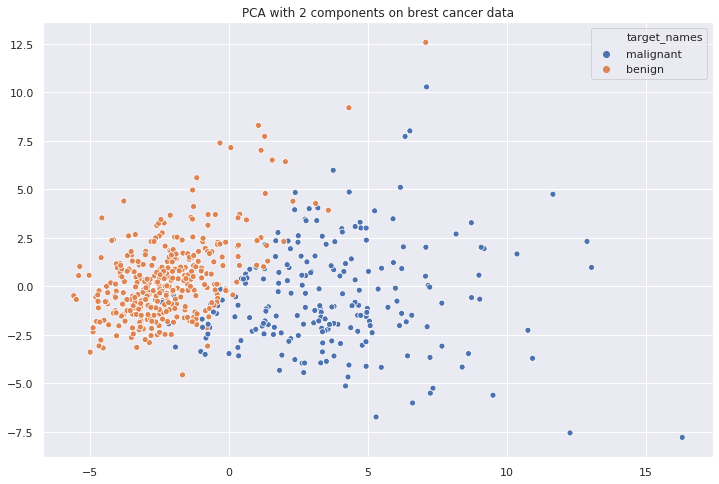

In [17]:
plot_pca(transformed_pca,df['target_names'])

<pre style='font-size : 15px;'>
Plotting features using PCA we represent our data better, also it's obvious 
that our data is easily gathered into two groups (cluster) 
by its transformed features. Let's now try it out with TSNE 
and plot results side by side for comparison.</pre>

In [18]:
transformed_tsne = TSNE(n_components=2).fit_transform(X)

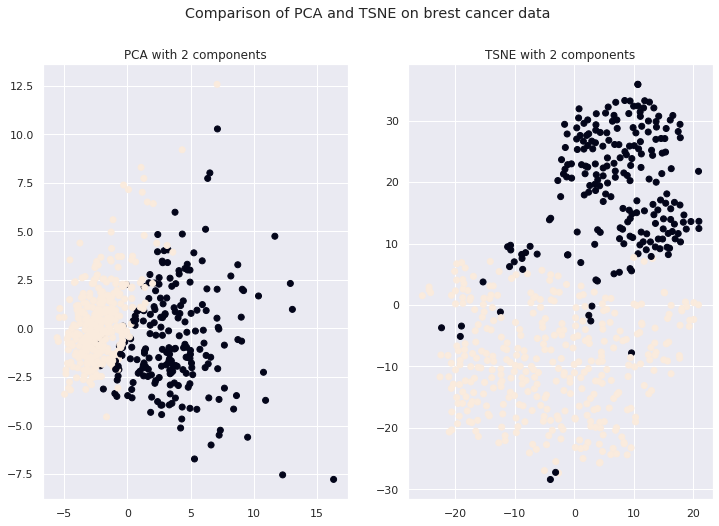

In [19]:
plot_side_by_side(transformed_pca,transformed_tsne,df['target'])

<pre style='font-size : 15px;'>
From the inset above we see that visualizations are different, unlike PCA 
in TSNE visualization clusters are more separated from each other. In practice
TSNE works much better in terms of dimensionality reduction and its more 
suitable for visualization purposes, but it becomes very slow and inpractical while working
with big datasets.</pre>

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Image compression with KMeans</b></pre>

In [25]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from PIL import Image
from io import BytesIO

<pre style='font-size : 15px'>We will start with loading an image. You can load any image you want,
by specifying a path to it in function <b>load_img</b> 
or choosing the image in colaboratory environment, like shown below:
</pre>
<img src='example_load_colab.png' alt="colab loading">

In [26]:
def load_image(path=None):
    colab = True
    try:
            from google.colab import files
            uploaded = files.upload()
            im = np.array(Image.open(BytesIO(uploaded[list(uploaded.keys())[0]])))
            return im
    except:
        colab = False
    if not colab and path:
        return plt.imread(path)
    else:
        print("You're not in colab environment, please specify path to your file!")

In [22]:
image= load_image(path='/home/volodymyr/mount.jpeg')

<pre style='font-size : 15px'>After loading the image, we can see its shape 
(as it's numpy array), by using <b>shape</b> function on it. 
First value is height, second is width and the last one is 
a number of channels. 
</pre>

In [27]:
image.shape

(334, 500, 3)

<pre style='font-size : 15px'>Function <b>show_image</b> shows loaded image.
</pre>

In [30]:
def show_image(image):
    plt.imshow(image)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([]);

<pre style='font-size : 15px'>Function <b>show_side_by_side_image</b> shows two images
side by side, before and after compression.
</pre>

In [31]:
def show_side_by_side_img(before,after):
    fig, ax = plt.subplots(1,2,figsize=(15,10))
    ax[0].imshow(before)
    ax[0].set_title('Image before compression')
    ax[1].imshow(after)
    ax[1].set_title('Image after compression')
    ax[0].grid(True)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].grid(True)
    ax[1].set_xticks([])
    ax[1].set_yticks([]);

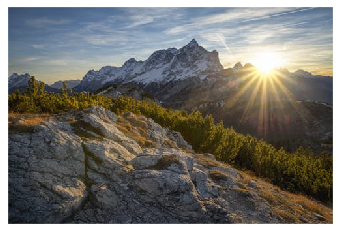

In [32]:
show_image(image)

<pre style='font-size : 15px'>Before applying KMeans, we should scale the data. 
Obvious choice for images is a max scale that is achieved by dividing 
image array by maximum value in it.
</pre>

In [33]:
to_compress = image/image.max()

In [36]:
to_compress[:2]

array([[[0.21176471, 0.28627451, 0.40392157],
        [0.21176471, 0.28627451, 0.40392157],
        [0.21176471, 0.28627451, 0.40392157],
        ...,
        [0.30196078, 0.39215686, 0.51372549],
        [0.30196078, 0.39215686, 0.51372549],
        [0.30196078, 0.39215686, 0.51372549]],

       [[0.21176471, 0.28627451, 0.40392157],
        [0.21176471, 0.28627451, 0.40392157],
        [0.21568627, 0.29019608, 0.40784314],
        ...,
        [0.30980392, 0.40392157, 0.51372549],
        [0.30980392, 0.40392157, 0.51372549],
        [0.30980392, 0.40392157, 0.51372549]]])

<pre style='font-size : 15px'>We now have an image array with values 
scaled between 0 and 1. We are ready to use KMeans on it.
In our example number of cluster will be equal to the 
size of compressed image. Feel free to play with this 
parameter to see the chnages in output image. Also, 
note that we use MiniBatchKMeans instead of ordinary 
KMeans that we used previously. MiniBatchKMeans works
much faster than KMeans on a data with lots of features.
<pre>

In [39]:
size = 128

In [40]:
k_colors = MiniBatchKMeans(n_clusters=size).fit(to_compress.reshape(-1,3))
new_image = k_colors.cluster_centers_[k_colors.labels_]
new_image = np.reshape(new_image, (image.shape))

<pre style='font-size : 15px'>We can now see changes before and after compression.
<pre>

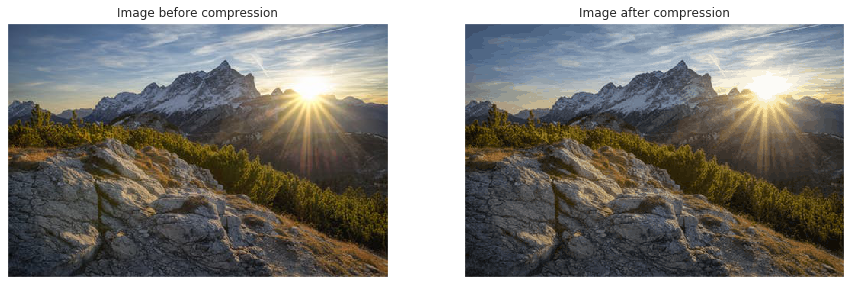

In [51]:
show_side_by_side_img(image,new_image)

<pre style='font-size : 15px'>Congratulations, you finished unsupervised learning section!
You were introduced to key concepts of clustering and dimensionality reduction. 
You also learned about different algorithms of unsupervised learning.
Finnaly, you had fun using KMeans for image compression. It still a lot
to learn, but we hope that our course warmed up your interest related to this field.
<pre>